# Захаров Николай Андреевич, leonov854@gmail.com, 2022

In [2]:
# Импорт библиотек
import numpy as np
import networkx as nx
import random as rnd

#Захаров Николай Андреевич, leonov854@gmail.com, 2022

In [4]:
# Матрица смежности
Peaks = 6
Min_Path = 1
Max_Path = 5
matrix = np.zeros([Peaks, Peaks])
for i in np.arange(0, Peaks, 1) :
  for j in np.arange(0, Peaks, 1) :
    if (i != j) :
      matrix[i, j] = rnd.randint(Min_Path, Max_Path)
      matrix[j, i] = matrix[i, j]
    else :
      matrix[i, j] = 0
matrix

#Захаров Николай Андреевич, leonov854@gmail.com, 2022

array([[0., 2., 3., 3., 2., 2.],
       [2., 0., 3., 4., 4., 1.],
       [3., 3., 0., 1., 3., 5.],
       [3., 4., 1., 0., 3., 5.],
       [2., 4., 3., 3., 0., 5.],
       [2., 1., 5., 5., 5., 0.]])

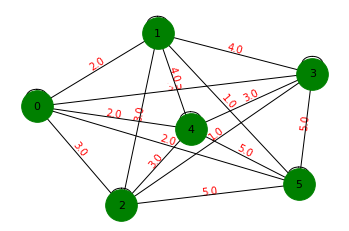

In [5]:
# Создание графа c использованием Силового алгоритма визуализации графов Фрухтермана-Рейнгольда
graphMatrix = nx.Graph()
for i in np.arange(0, Peaks, 1) :
  for j in np.arange(0, Peaks, 1) :
    graphMatrix.add_edge(i, j, weight = matrix[i][j])
Spring_Layout = nx.spring_layout(graphMatrix)
Path_Label = nx.get_edge_attributes(graphMatrix, "weight")
nx.draw_networkx_edge_labels(graphMatrix, Spring_Layout, Path_Label, font_color='red', verticalalignment='baseline')
nx.draw(graphMatrix, Spring_Layout, with_labels = True, node_size = 1000, node_color='green', font_size = 11)

#Захаров Николай Андреевич, leonov854@gmail.com, 2022

In [149]:
# Операторы
# Объявление переменных
Start_Point = 0
End_Point = 3
countIndividuals = 7
countGeneration  = 5
percentMutation = 0.5
# Исходная популяция
def initPopulation() :
  population = []
  neighbor_Individuals = [countIndividuals for countIndividuals in graphMatrix.neighbors(Start_Point)]
  for i in range(countIndividuals) :
    chrom = []
    chrom.append(Start_Point)
    while len(chrom) != countIndividuals - 1 :
      buf = rnd.choice(neighbor_Individuals)
      if buf != End_Point :
        chrom.append(buf)
    chrom.append(End_Point)
    population.append(chrom)
  return population
# Поиск короткого пути
def functionPathCalc(chromLocal) :
  weight = 0
  for i in range(len(chromLocal) - 1) :
      weight += int(matrix[chromLocal[i], chromLocal[i + 1]])
  return weight
# Кол-во поколений
def functionSelection(populationLocal) :
  populationSelectedLocal = []
  for step in range(countIndividuals) :
    chrom_1 = rnd.choice(populationLocal)
    chrom_2 = rnd.choice(populationLocal)
    if functionPathCalc(chrom_1) <= functionPathCalc(chrom_2) :
      populationSelectedLocal.append(chrom_1)
    else :
      populationSelectedLocal.append(chrom_2)
  return populationSelectedLocal
# Варианты кроссовера
def functionCrosses(populationLocal) :
  populationCrossedLocal = []
  cutLine = len(populationLocal[0]) // 2
  for chrom in range(len(populationLocal)) :
    chrom_X = rnd.choice(populationLocal)
    chrom_Y = rnd.choice(populationLocal)
    crossedElement = chrom_X[:cutLine] + chrom_Y[cutLine:]
    populationCrossedLocal.append(crossedElement)
  return populationCrossedLocal
# Вероятность мутации
def functionMutation(populationLocal) :
  populationMutatedLocal = []
  for chrom in range(len(populationLocal)) :
    change = rnd.random() 
    if change <= percentMutation :
      rndGenId = rnd.randint(1, (len(populationLocal[chrom]) - 2))
      rndGen = rnd.randint(0, (Peaks - 1))
      while (rndGen == Start_Point) or (rndGen == End_Point) :
        rndGen = rnd.randint(0, (Peaks - 1))
      populationLocal[chrom][rndGenId] = rndGen
      populationMutatedLocal.append(populationLocal[chrom])
    else :
      populationMutatedLocal.append(populationLocal[chrom])
      continue
  return populationMutatedLocal
  
#Захаров Николай Андреевич, leonov854@gmail.com, 2022

In [151]:
# Алгоритм
countGen = 1
population = initPopulation()
print("Результат инициализации популяции:\n",population)
pathResult = [functionPathCalc(chrom) for chrom in population]
print("Максимальная длина поколение = ",max(pathResult))
print("Минимальная длина поколение  = ",min(pathResult),'\n')
for step in range(countGeneration) :
  populationSelected = functionSelection(population)
  populationCrossed = functionCrosses(populationSelected)
  populationMutated = functionMutation(populationCrossed)
  population = populationMutated
  print(countGen,"-ое поколение:")
  print(population)
  pathResult = [functionPathCalc(chrom) for chrom in population]
  print("Максимальная длина поколение = ",max(pathResult))
  print("Минимальная длина поколение  = ",min(pathResult),'\n')
  countGen += 1

#Захаров Николай Андреевич, leonov854@gmail.com, 2022

Результат инициализации популяции:
 [[0, 4, 1, 1, 2, 0, 3], [0, 4, 1, 2, 4, 4, 3], [0, 0, 5, 4, 0, 5, 3], [0, 5, 2, 5, 1, 0, 3], [0, 1, 1, 2, 5, 5, 3], [0, 0, 0, 1, 5, 2, 3], [0, 0, 1, 4, 5, 0, 3]]
Максимальная длина поколение =  23
Минимальная длина поколение  =  12 

1 -ое поколение:
[[0, 0, 5, 4, 0, 5, 3], [0, 0, 5, 4, 0, 5, 3], [0, 0, 5, 4, 0, 5, 3], [0, 0, 5, 1, 5, 2, 3], [0, 0, 5, 4, 5, 0, 3], [0, 0, 1, 4, 4, 5, 3], [0, 0, 0, 4, 5, 0, 3]]
Максимальная длина поколение =  14
Минимальная длина поколение  =  9 

2 -ое поколение:
[[0, 0, 5, 4, 5, 0, 3], [0, 2, 0, 4, 0, 5, 3], [0, 0, 1, 1, 5, 2, 3], [0, 0, 1, 4, 5, 0, 3], [0, 0, 5, 4, 4, 2, 3], [0, 0, 1, 4, 0, 5, 3], [0, 0, 1, 4, 4, 5, 3]]
Максимальная длина поколение =  16
Минимальная длина поколение  =  8 

3 -ое поколение:
[[0, 0, 5, 4, 4, 2, 3], [0, 0, 5, 4, 4, 2, 3], [0, 0, 1, 4, 4, 2, 3], [0, 0, 5, 4, 4, 5, 3], [0, 0, 5, 4, 4, 5, 3], [0, 0, 5, 4, 4, 2, 3], [0, 0, 5, 4, 4, 2, 3]]
Максимальная длина поколение =  9
Минимальная длина